In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# Working with Text

In [2]:
path = '../Data/titanic.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",f,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [6]:
df['age'] = df['age'].replace(['?'], [None]).astype('float').round()
df['fare'] = df['fare'].replace(['?'], [None]).astype('float').round()

## 01. The String Datatype vs Object Datatype

- In Object Datatype, anything can be stored like list, boolean or strings
- In strings, only strings can be stored

In [7]:
df.name.dtype # Object

dtype('O')

In [8]:
df.name[0] = [1,2,3]
# we can replace a string with list

C:\Users\vamsh\AppData\Local\Temp\ipykernel_19244\369334720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[0] = [1,2,3]


In [9]:
df.name[0][0]

1

In [10]:
type(df.name[0])

list

In [11]:
df.name = df.name.astype('string')
# now, it's no more a objects

# it's a string datatype

In [12]:
type(df.name[0])

str

In [13]:
df.name[0][0]

'['

## 02. Identifying inconsistent data

While there is no specific method to identify inconsistent text & typos, you can take the following two approaches to check a column depending on its data type:

- **Categorical Data** -  Look at the unique values in the column.
    - `df[column].value_counts()`
- **Numerical Data** - Look at the descriptive stats of the column.
    - `df[column].describe()`

You can fix inconsistent text and typos by using:
1. **.loc[]** to update a value at a particular location
2. **np.where()** to update values in a column based on a conditional statement
3. **.map()** to map a set of values to another set of values.
4. **String methods** like str.lower(), str.strip() & str.replace() to clean text data.

In [14]:
df = pd.read_csv(path)

In [15]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",f,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [16]:
df.sex.value_counts()

sex
male      841
female    463
F           2
M           2
f           1
Name: count, dtype: int64

In this data,for data consistency:
- M -> male
- F & f -> female

In [17]:
df.sex = np.where(df.sex == 'f', 'female',df.sex)

In [18]:
df.sex = np.where(df.sex == 'F', 'female',df.sex)

In [19]:
df.sex = np.where(df.sex == 'M', 'male',df.sex)

In [20]:
df.sex.value_counts()

sex
male      843
female    466
Name: count, dtype: int64

## 03. Case Operations

- title()
- upper()
- lower()
- swapcase()
- capitalize()

### str.title()

In [21]:
df.name.str.title()

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

### str.upper()

In [22]:
df.name.str.upper()

0                         ALLEN, MISS. ELISABETH WALTON
1                        ALLISON, MASTER. HUDSON TREVOR
2                          ALLISON, MISS. HELEN LORAINE
3                  ALLISON, MR. HUDSON JOSHUA CREIGHTON
4       ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)
                             ...                       
1304                               ZABOUR, MISS. HILENI
1305                              ZABOUR, MISS. THAMINE
1306                          ZAKARIAN, MR. MAPRIEDEDER
1307                                ZAKARIAN, MR. ORTIN
1308                                 ZIMMERMAN, MR. LEO
Name: name, Length: 1309, dtype: object

### str.lower()

In [23]:
df.name.str.lower()

0                         allen, miss. elisabeth walton
1                        allison, master. hudson trevor
2                          allison, miss. helen loraine
3                  allison, mr. hudson joshua creighton
4       allison, mrs. hudson j c (bessie waldo daniels)
                             ...                       
1304                               zabour, miss. hileni
1305                              zabour, miss. thamine
1306                          zakarian, mr. mapriededer
1307                                zakarian, mr. ortin
1308                                 zimmerman, mr. leo
Name: name, Length: 1309, dtype: object

### str.swapcase()

In [24]:
df.name.str.swapcase()

0                         aLLEN, mISS. eLISABETH wALTON
1                        aLLISON, mASTER. hUDSON tREVOR
2                          aLLISON, mISS. hELEN lORAINE
3                  aLLISON, mR. hUDSON jOSHUA cREIGHTON
4       aLLISON, mRS. hUDSON j c (bESSIE wALDO dANIELS)
                             ...                       
1304                               zABOUR, mISS. hILENI
1305                              zABOUR, mISS. tHAMINE
1306                          zAKARIAN, mR. mAPRIEDEDER
1307                                zAKARIAN, mR. oRTIN
1308                                 zIMMERMAN, mR. lEO
Name: name, Length: 1309, dtype: object

### str.capitalize()

In [25]:
df.name.str.capitalize()

0                         Allen, miss. elisabeth walton
1                        Allison, master. hudson trevor
2                          Allison, miss. helen loraine
3                  Allison, mr. hudson joshua creighton
4       Allison, mrs. hudson j c (bessie waldo daniels)
                             ...                       
1304                               Zabour, miss. hileni
1305                              Zabour, miss. thamine
1306                          Zakarian, mr. mapriededer
1307                                Zakarian, mr. ortin
1308                                 Zimmerman, mr. leo
Name: name, Length: 1309, dtype: object

**Interpretation:**
- Returns start of the index
- if not found in the text, returns `-1`

## 04. Strips and Whitespace

- Removing leading and trailing spaces in the text

**Methods:**
- isspace()
- lstrip()
- rstrip()
- strip()

### lstrip() - left strip (removing leading spaces)

In [27]:
df.name.str.split(',').str[1].str.len()

0       23
1       22
2       20
3       28
4       39
        ..
1304    13
1305    14
1306    16
1307    10
1308     8
Name: name, Length: 1309, dtype: int64

In [28]:
df.name.str.split(',').str[1].str.lstrip()

0                       Miss. Elisabeth Walton
1                        Master. Hudson Trevor
2                          Miss. Helen Loraine
3                  Mr. Hudson Joshua Creighton
4       Mrs. Hudson J C (Bessie Waldo Daniels)
                         ...                  
1304                              Miss. Hileni
1305                             Miss. Thamine
1306                           Mr. Mapriededer
1307                                 Mr. Ortin
1308                                   Mr. Leo
Name: name, Length: 1309, dtype: object

In [29]:
df.name.str.split(',').str[1].str.len()

0       23
1       22
2       20
3       28
4       39
        ..
1304    13
1305    14
1306    16
1307    10
1308     8
Name: name, Length: 1309, dtype: int64

In [30]:
df.name.str.split(',').str[1].str.lstrip()

0                       Miss. Elisabeth Walton
1                        Master. Hudson Trevor
2                          Miss. Helen Loraine
3                  Mr. Hudson Joshua Creighton
4       Mrs. Hudson J C (Bessie Waldo Daniels)
                         ...                  
1304                              Miss. Hileni
1305                             Miss. Thamine
1306                           Mr. Mapriededer
1307                                 Mr. Ortin
1308                                   Mr. Leo
Name: name, Length: 1309, dtype: object

In [31]:
df.name.str.split(',').str[1].str.lstrip().str.len()

0       22
1       21
2       19
3       27
4       38
        ..
1304    12
1305    13
1306    15
1307     9
1308     7
Name: name, Length: 1309, dtype: int64

### rstrip() - right strip (removing trailing spaces)

In [32]:
df.name.str.rstrip()

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

### strip() - Removing spaces from both sides

In [33]:
df.name.str.strip()

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

## 05. String splitting and Concatenation

- **split()** and its parameters - splitting the strings
- **get()** - extracting elements from a string
- **cat()** - concatenating strings

### str.split() & it's parameters

Use **str.split()** to split a column by a delimiter into multiple columns

In [34]:
df.sample()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1122,3,1,"Peter, Miss. Anna",female,?,1,1,2668,22.3583,F E69,C,D,?,?


In [35]:
df['home.dest'].str.split(',')

0                           [St Louis,  MO]
1       [Montreal,  PQ / Chesterville,  ON]
2       [Montreal,  PQ / Chesterville,  ON]
3       [Montreal,  PQ / Chesterville,  ON]
4       [Montreal,  PQ / Chesterville,  ON]
                       ...                 
1304                                    [?]
1305                                    [?]
1306                                    [?]
1307                                    [?]
1308                                    [?]
Name: home.dest, Length: 1309, dtype: object

In [36]:
# expand=True, turns the list into a dataframe
df['home.dest'].str.split(',', expand=True)

,0,1,2,3
0,St Louis,MO,None,None
1,Montreal,PQ / Chesterville,ON,None
2,Montreal,PQ / Chesterville,ON,None
3,Montreal,PQ / Chesterville,ON,None
4,Montreal,PQ / Chesterville,ON,None
...,...,...,...,...
1304,?,None,None,None
1305,?,None,None,None
1306,?,None,None,None
1307,?,None,None,None


In [37]:
df['home.dest'].str.split('/', expand=True, n=1)

,0,1
0,"St Louis, MO",None
1,"Montreal, PQ","Chesterville, ON"
2,"Montreal, PQ","Chesterville, ON"
3,"Montreal, PQ","Chesterville, ON"
4,"Montreal, PQ","Chesterville, ON"
...,...,...
1304,?,None
1305,?,None
1306,?,None
1307,?,None


In [38]:
# n=1, tell the split has to be done only once.
df[['source', 'destination']] = df['home.dest'].str.split('/', expand=True, n=1)

In [39]:
df.sample()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,source,destination
271,1,1,"Snyder, Mr. John Pillsbury",male,24,1,0,21228,82.2667,B45,S,7,?,"Minneapolis, MN","Minneapolis, MN",None


### str.get()
- to extract the values from the vectorized strings

In [40]:
df['name'].str.split(',')

0                        [Allen,  Miss. Elisabeth Walton]
1                       [Allison,  Master. Hudson Trevor]
2                         [Allison,  Miss. Helen Loraine]
3                 [Allison,  Mr. Hudson Joshua Creighton]
4       [Allison,  Mrs. Hudson J C (Bessie Waldo Danie...
                              ...                        
1304                              [Zabour,  Miss. Hileni]
1305                             [Zabour,  Miss. Thamine]
1306                         [Zakarian,  Mr. Mapriededer]
1307                               [Zakarian,  Mr. Ortin]
1308                                [Zimmerman,  Mr. Leo]
Name: name, Length: 1309, dtype: object

In [41]:
df['name'].str.split(',').str.get(0)

0           Allen
1         Allison
2         Allison
3         Allison
4         Allison
          ...    
1304       Zabour
1305       Zabour
1306     Zakarian
1307     Zakarian
1308    Zimmerman
Name: name, Length: 1309, dtype: object

### str.cat()

In [42]:
df.sample()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,source,destination
476,2,0,"Lahtinen, Rev. William",male,30,1,1,250651,26,?,S,?,?,"Minneapolis, MN","Minneapolis, MN",None


In [43]:
df['sex'].str.cat(df['age'], sep='_')

0         female_29
1       male_0.9167
2          female_2
3           male_30
4         female_25
           ...     
1304    female_14.5
1305       female_?
1306      male_26.5
1307        male_27
1308        male_29
Name: sex, Length: 1309, dtype: object

## 06. Masking with String Methods

- Boolean masking (or indexing):
  - create sequence of booleans
  - use sequence to select from dataframe (or series)

### conditional

In [44]:
df.sex == 'male'

0       False
1        True
2       False
3        True
4       False
        ...  
1304    False
1305    False
1306     True
1307     True
1308     True
Name: sex, Length: 1309, dtype: bool

### str.match

In [45]:
df.sex.str.match('male')

0       False
1        True
2       False
3        True
4       False
        ...  
1304    False
1305    False
1306     True
1307     True
1308     True
Name: sex, Length: 1309, dtype: bool

In [46]:
df.loc[df.sex.str.match('male')]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,source,destination
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY","New York, NY",None
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI","Belfast, NI",None
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay","Montevideo, Uruguay",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,?,0,0,2647,7.225,?,C,?,?,?,?,None
1303,3,0,"Yousseff, Mr. Gerious",male,?,0,0,2627,14.4583,?,C,?,?,?,?,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?,?,None
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?,?,None


### str.contains

Use **str.contains()** to find words or patterns within a text field.

In [47]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,source,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO","St Louis, MO",None
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?,?,None
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?,?,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?,?,None
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?,?,None


In [48]:
miss = df.name.str.contains('Miss')
miss

0        True
1       False
2        True
3       False
4       False
        ...  
1304     True
1305     True
1306    False
1307    False
1308    False
Name: name, Length: 1309, dtype: bool

In [49]:
df.loc[miss]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,source,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO","St Louis, MO",None
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY","Hudson, NY",None
13,1,1,"Barber, Miss. Ellen 'Nellie'",female,26,0,0,19877,78.85,?,S,6,?,?,?,None
18,1,1,"Bazzani, Miss. Albina",female,32,0,0,11813,76.2917,D15,C,8,?,?,?,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3,0,"Van Impe, Miss. Catharina",female,10,0,2,345773,24.15,?,S,?,?,?,?,None
1273,3,0,"Vander Planke, Miss. Augusta Maria",female,18,2,0,345764,18,?,S,?,?,?,?,None
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,?,S,?,?,?,?,None
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?,?,None


## 07. Slicing Substrings

### str.slice()

In [50]:
df.name.str.slice(start=0, stop=10, step=1)

0       Allen, Mis
1       Allison, M
2       Allison, M
3       Allison, M
4       Allison, M
           ...    
1304    Zabour, Mi
1305    Zabour, Mi
1306    Zakarian, 
1307    Zakarian, 
1308    Zimmerman,
Name: name, Length: 1309, dtype: object

### str.indexing

In [51]:
df.name.str[0:10:1]

0       Allen, Mis
1       Allison, M
2       Allison, M
3       Allison, M
4       Allison, M
           ...    
1304    Zabour, Mi
1305    Zabour, Mi
1306    Zakarian, 
1307    Zakarian, 
1308    Zimmerman,
Name: name, Length: 1309, dtype: object

## 08. String Replacement

### str.replace()

In [52]:
(df.sex
   .str.replace('female','F')
   .str.replace('male', 'M')
)

0       F
1       M
2       F
3       M
4       F
       ..
1304    F
1305    F
1306    M
1307    M
1308    M
Name: sex, Length: 1309, dtype: object

In [53]:
(df.sex
   .str.replace('female','F')
   .str.replace('male', 'M')
)

0       F
1       M
2       F
3       M
4       F
       ..
1304    F
1305    F
1306    M
1307    M
1308    M
Name: sex, Length: 1309, dtype: object

In [54]:
df.age = df.age.replace('?', 0)

In [55]:
df.fare = df.fare.replace('?',0).astype(float)

### case insensitive replacement

In [56]:
df.sex.str.replace('m', 'male')

0       femaleale
1         maleale
2       femaleale
3         maleale
4       femaleale
          ...    
1304    femaleale
1305    femaleale
1306      maleale
1307      maleale
1308      maleale
Name: sex, Length: 1309, dtype: object

In [57]:
df.sex.str.replace('m', 'male', case=False)

0       femaleale
1         maleale
2       femaleale
3         maleale
4       femaleale
          ...    
1304    femaleale
1305    femaleale
1306      maleale
1307      maleale
1308      maleale
Name: sex, Length: 1309, dtype: object

## 09. Values Mappings

Use **`.map()`** to map values from one set of values to another set of values.

In [58]:
sex_mappings = {
    'M':'male',
    "F":'female'
}

In [59]:
df.sex.map(sex_mappings)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: sex, Length: 1309, dtype: object

## 10. Apply functions

### simple functions

In [60]:
df.age = df.age.astype('float').round()

In [61]:
def get_age_group(age):
    if age < 2:
        return 'dependent'
    elif age < 12:
        return 'troubler'
    elif age < 18:
        return 'idiots'
    elif age < 35:
        return 'responsiblities'
    elif age < 50:
        return 'mid-life crisis'
    elif age < 65:
        return 'wandering'
    else: 
        return 'give up on life'

In [62]:
df.age.apply(get_age_group)

0       responsiblities
1             dependent
2              troubler
3       responsiblities
4       responsiblities
             ...       
1304             idiots
1305          dependent
1306    responsiblities
1307    responsiblities
1308    responsiblities
Name: age, Length: 1309, dtype: object

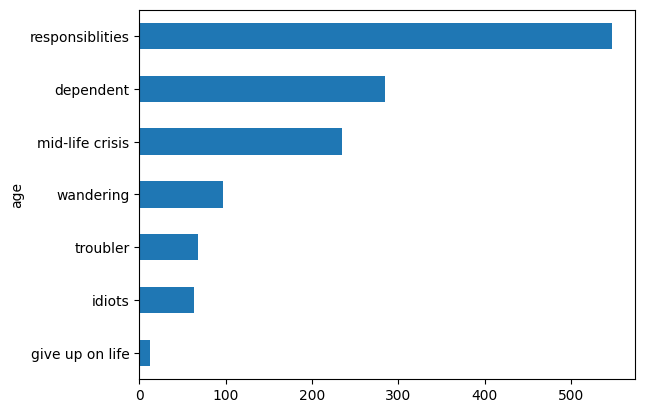

In [63]:
df.age.apply(get_age_group).value_counts().sort_values().plot(kind='barh');

### lambda functions

In [64]:
df['fare'] = df['fare'].round()

In [65]:
df['fare']

0       211.0
1       152.0
2       152.0
3       152.0
4       152.0
        ...  
1304     14.0
1305     14.0
1306      7.0
1307      7.0
1308      8.0
Name: fare, Length: 1309, dtype: float64

In [66]:
df['fare'].apply(lambda fare: f"$ {fare*24}")

0       $ 5064.0
1       $ 3648.0
2       $ 3648.0
3       $ 3648.0
4       $ 3648.0
          ...   
1304     $ 336.0
1305     $ 336.0
1306     $ 168.0
1307     $ 168.0
1308     $ 192.0
Name: fare, Length: 1309, dtype: object

### lambda funcs with arguments

In [67]:
def convert_currency(num, multiplier):
    return f"$ {num*multiplier}"

In [68]:
df['fare'].apply(convert_currency, args=(24,))
# in args, ',' has to be mentioned otherwise it doesn't work.

0       $ 5064.0
1       $ 3648.0
2       $ 3648.0
3       $ 3648.0
4       $ 3648.0
          ...   
1304     $ 336.0
1305     $ 336.0
1306     $ 168.0
1307     $ 168.0
1308     $ 192.0
Name: fare, Length: 1309, dtype: object

## 11.  Parsing indicators with get_dummies()

In [69]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,source,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.0,B5,S,2,?,"St Louis, MO","St Louis, MO",None
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,152.0,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,152.0,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,152.0,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,152.0,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"


In [70]:
df['sex'].str.get_dummies()

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


### the df.insert() and .columns.get_loc

In [71]:
dummies = df['sex'].str.get_dummies()
dummies

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [74]:
df.insert(
    df.columns.get_loc('sex')+1,
    'Male',
    dummies['male']
)

df.insert(
    df.columns.get_loc('sex')+2,
    'Female',
    dummies['female']
)

In [75]:
df.head()

,pclass,survived,name,sex,Male,Female,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,source,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,1,29.0,0,0,24160,211.0,B5,S,2,?,"St Louis, MO","St Louis, MO",None
1,1,1,"Allison, Master. Hudson Trevor",male,1,0,1.0,1,2,113781,152.0,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,0,1,2.0,1,2,113781,152.0,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,0,30.0,1,2,113781,152.0,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,0,1,25.0,1,2,113781,152.0,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON"


## 12. Finding Characters & Words

- find()
- rfind() in python and pandas

- **`find()`** starts from left to right
- **`rfind()`** starts from right to left

In [26]:
df['home.dest'].str.lower().str.find('montreal').value_counts()

home.dest
-1     1285
 0       14
 8        4
 9        2
 12       2
 22       2
Name: count, dtype: int64